<a href="https://colab.research.google.com/github/hussain033/Disease-Prediction/blob/main/diseaseClassify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Disease Prediction using Symptoms


##Importing libraries

In [ ]:
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
sk.__version__

'1.0.2'

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report


##Loading data

In [ ]:
train = pd.read_csv("Datasets/Disease_Training.csv")
test = pd.read_csv("Datasets/Disease_Testing.csv")
print(test.shape)
train.shape

(42, 134)


(306, 134)

##Analysing and visualizing Dataset

In [ ]:
train.head().values


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 'AIDS'],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 'AIDS'],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
print(train.columns.unique)


<bound method Index.unique of Index(['abdominal_pain', 'abnormal_menstruation', 'acidity',
       'acute_liver_failure', 'altered_sensorium', 'anxiety', 'back_pain',
       'belly_pain', 'blackheads', 'bladder_discomfort',
       ...
       'watering_from_eyes', 'weakness_in_limbs', 'weakness_of_one_body_side',
       'weight_gain', 'weight_loss', 'yellow_crust_ooze', 'yellow_urine',
       'yellowing_of_eyes', 'yellowish_skin', 'prognosis'],
      dtype='object', length=134)>


In [ ]:
colums = train.columns.values.tolist()
colums.remove('prognosis')
colums

['abdominal_pain',
 'abnormal_menstruation',
 'acidity',
 'acute_liver_failure',
 'altered_sensorium',
 'anxiety',
 'back_pain',
 'belly_pain',
 'blackheads',
 'bladder_discomfort',
 'blister',
 'blood_in_sputum',
 'bloody_stool',
 'blurred_and_distorted_vision',
 'breathlessness',
 'brittle_nails',
 'bruising',
 'burning_micturition',
 'chest_pain',
 'chills',
 'cold_hands_and_feet',
 'coma',
 'congestion',
 'constipation',
 'continuous_feel_of_urine',
 'continuous_sneezing',
 'cough',
 'cramps',
 'dark_urine',
 'dehydration',
 'depression',
 'diarrhoea',
 'dyschromic_patches',
 'distention_of_abdomen',
 'dizziness',
 'drying_and_tingling_lips',
 'enlarged_thyroid',
 'excessive_hunger',
 'extra_marital_contacts',
 'family_history',
 'fast_heart_rate',
 'fatigue',
 'fluid_overload',
 'foul_smell_of urine',
 'headache',
 'high_fever',
 'hip_joint_pain',
 'history_of_alcohol_consumption',
 'increased_appetite',
 'indigestion',
 'inflammatory_nails',
 'internal_itching',
 'irregular_sugar

In [ ]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Columns: 134 entries, abdominal_pain to prognosis
dtypes: int64(133), object(1)
memory usage: 320.5+ KB


In [ ]:
train.describe()

,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,vomiting,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin
count,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,...,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000
mean,0.228758,0.055556,0.049020,0.026144,0.013072,0.026144,0.049020,0.026144,0.013072,0.013072,...,0.382353,0.013072,0.016340,0.013072,0.022876,0.104575,0.016340,0.026144,0.189542,0.199346
std,0.420721,0.229437,0.216263,0.159824,0.113769,0.159824,0.216263,0.159824,0.113769,0.113769,...,0.486758,0.113769,0.126987,0.113769,0.149752,0.306506,0.126987,0.159824,0.392581,0.400163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##Train, Validation and Test dataset split and Preprocessing Dataset

In [ ]:
train, valid = train_test_split(train, test_size = 0.25, shuffle = True)

In [ ]:
x_train = train.drop(['prognosis'],axis = 1)
y_train = train['prognosis']
print(x_train.shape)
y_train.shape

(229, 133)


(229,)

In [ ]:
x_valid = valid.drop(['prognosis'], axis = 1)
y_valid = valid['prognosis']

In [ ]:
test.shape

(42, 134)

In [ ]:
x_test = test.drop(['prognosis'],axis = 1)
y_test = test['prognosis']

In [ ]:
x_train = x_train.values
x_test = x_test.values
x_valid = x_valid.values

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
lgR = LogisticRegression()
lgR

LogisticRegression()

In [ ]:
lgR.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_hat_train = lgR.predict(x_train)
res = accuracy_score(y_train, y_hat_train)
res

1.0

In [ ]:
y_hat = lgR.predict(x_valid)
res = accuracy_score(y_valid, y_hat)
res

0.948051948051948

In [ ]:
conf = confusion_matrix(y_valid,y_hat)


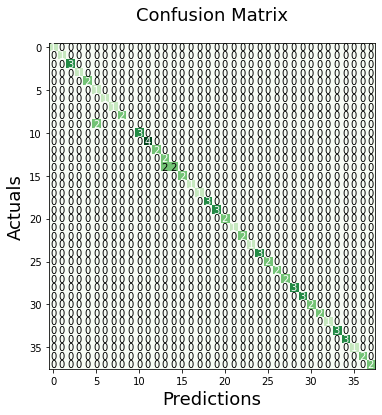

In [ ]:

fig, ax = plot_confusion_matrix(conf_mat=conf, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print(classification_report(y_train, y_hat_train))

                               precision    recall  f1-score   support

                         AIDS       1.00      1.00      1.00         4
                         Acne       1.00      1.00      1.00         4
          Alcoholic hepatitis       1.00      1.00      1.00         5
                      Allergy       1.00      1.00      1.00         4
                    Arthritis       1.00      1.00      1.00         4
             Bronchial Asthma       1.00      1.00      1.00         6
         Cervical spondylosis       1.00      1.00      1.00         6
                  Chicken pox       1.00      1.00      1.00         9
          Chronic cholestasis       1.00      1.00      1.00         7
                  Common Cold       1.00      1.00      1.00         7
                       Dengue       1.00      1.00      1.00         7
                    Diabetes        1.00      1.00      1.00         5
 Dimorphic hemorrhoids(piles)       1.00      1.00      1.00         4
     

In [ ]:
y_hat_test = lgR.predict(x_test)
accuracy_score(y_hat_test, y_test)

0.9761904761904762

In [ ]:
print(classification_report(y_hat_test, y_test))

                               precision    recall  f1-score   support

                         AIDS       1.00      1.00      1.00         1
                         Acne       1.00      1.00      1.00         1
          Alcoholic hepatitis       1.00      1.00      1.00         1
                      Allergy       1.00      1.00      1.00         1
                    Arthritis       1.00      1.00      1.00         1
             Bronchial Asthma       1.00      0.50      0.67         2
         Cervical spondylosis       1.00      1.00      1.00         1
                  Chicken pox       1.00      1.00      1.00         1
          Chronic cholestasis       1.00      1.00      1.00         1
                  Common Cold       1.00      1.00      1.00         1
                        Covid       0.00      0.00      0.00         0
                       Dengue       1.00      1.00      1.00         1
                    Diabetes        1.00      1.00      1.00         1
 Dimo

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##KNN classifier

In [ ]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=1)


In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_train_hatk = knn.predict(x_train)
accuracy_score(y_train, y_train_hatk)

1.0

In [ ]:
y_hk = knn.predict(x_valid)
accuracy_score(y_valid,y_hk)

1.0

In [ ]:
print(classification_report(y_valid, y_hk))

                               precision    recall  f1-score   support

                         AIDS       1.00      1.00      1.00         2
          Alcoholic hepatitis       1.00      1.00      1.00         1
                      Allergy       1.00      1.00      1.00         1
             Bronchial Asthma       1.00      1.00      1.00         2
         Cervical spondylosis       1.00      1.00      1.00         1
                  Chicken pox       1.00      1.00      1.00         2
          Chronic cholestasis       1.00      1.00      1.00         3
                  Common Cold       1.00      1.00      1.00         1
                        Covid       1.00      1.00      1.00         1
                       Dengue       1.00      1.00      1.00         3
                    Diabetes        1.00      1.00      1.00         2
 Dimorphic hemorrhoids(piles)       1.00      1.00      1.00         2
                Drug Reaction       1.00      1.00      1.00         2
     

##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dst = DecisionTreeClassifier()

In [ ]:
dst.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_hatTdst = dst.predict(x_train)
accuracy_score(y_train, y_hatTdst)

1.0

In [ ]:
y_hatdst = dst.predict(x_valid)

In [ ]:
accuracy_score(y_valid, y_hatdst)

0.7142857142857143

In [ ]:
print(classification_report(y_valid, y_hatdst))

##Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_hatTrfc = rfc.predict(x_train)
accuracy_score(y_train, y_hatTrfc)

1.0

In [ ]:
y_hatrfc = rfc.predict(x_valid)

In [ ]:
accuracy_score(y_valid, y_hatrfc)

1.0

In [ ]:
print(classification_report(y_valid, y_hatrfc))

                               precision    recall  f1-score   support

                         AIDS       1.00      1.00      1.00         2
          Alcoholic hepatitis       1.00      1.00      1.00         1
                      Allergy       1.00      1.00      1.00         2
                    Arthritis       1.00      1.00      1.00         1
             Bronchial Asthma       1.00      1.00      1.00         1
         Cervical spondylosis       1.00      1.00      1.00         4
                  Chicken pox       1.00      1.00      1.00         1
                  Common Cold       1.00      1.00      1.00         2
                       Dengue       1.00      1.00      1.00         3
                    Diabetes        1.00      1.00      1.00         2
 Dimorphic hemorrhoids(piles)       1.00      1.00      1.00         2
                Drug Reaction       1.00      1.00      1.00         1
             Fungal infection       1.00      1.00      1.00         2
     

##SVM classifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [ ]:
y_hatTsvc = svc.predict(x_train)
accuracy_score(y_train, y_hatTsvc)

1.0

In [ ]:
y_hatsvc = svc.predict(x_valid)
accuracy_score(y_valid, y_hatsvc)

1.0

In [ ]:
print(classification_report(y_valid, y_hatrfc))

                               precision    recall  f1-score   support

                         AIDS       1.00      1.00      1.00         2
          Alcoholic hepatitis       1.00      1.00      1.00         1
                      Allergy       1.00      1.00      1.00         2
                    Arthritis       1.00      1.00      1.00         1
             Bronchial Asthma       1.00      1.00      1.00         1
         Cervical spondylosis       1.00      1.00      1.00         4
                  Chicken pox       1.00      1.00      1.00         1
                  Common Cold       1.00      1.00      1.00         2
                       Dengue       1.00      1.00      1.00         3
                    Diabetes        1.00      1.00      1.00         2
 Dimorphic hemorrhoids(piles)       1.00      1.00      1.00         2
                Drug Reaction       1.00      1.00      1.00         1
             Fungal infection       1.00      1.00      1.00         2
     

##Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nvb = GaussianNB()

In [ ]:
nvb.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_hatTnvb = nvb.predict(x_train)
accuracy_score(y_train, y_hatTnvb)

1.0

In [ ]:
y_hat = nvb.predict(x_valid)
accuracy_score(y_valid, y_hat)

1.0

In [ ]:
print(classification_report(y_valid,y_hat))

                               precision    recall  f1-score   support

                         AIDS       1.00      1.00      1.00         2
          Alcoholic hepatitis       1.00      1.00      1.00         1
                      Allergy       1.00      1.00      1.00         2
                    Arthritis       1.00      1.00      1.00         1
             Bronchial Asthma       1.00      1.00      1.00         1
         Cervical spondylosis       1.00      1.00      1.00         4
                  Chicken pox       1.00      1.00      1.00         1
                  Common Cold       1.00      1.00      1.00         2
                       Dengue       1.00      1.00      1.00         3
                    Diabetes        1.00      1.00      1.00         2
 Dimorphic hemorrhoids(piles)       1.00      1.00      1.00         2
                Drug Reaction       1.00      1.00      1.00         1
             Fungal infection       1.00      1.00      1.00         2
     

##Creating Function for Real world prediction


In [ ]:
def prediction(data):
  dat = data.reshape(1,-1)
  pred = lgR.predict(dat)
  return pred

In [ ]:
def preprocess(data):
  lis = np.zeros(len(colums))
  for i in data.values:
    if i != 0:
      i = i.strip()
      if i in colums:
        lis[colums.index(i)] = 1
  return lis

In [ ]:
Rtest = pd.read_csv('Datasets/Disease_Inference.csv')

In [ ]:
df = Rtest.sample(frac = 1)
df

,Disease,Symptom_1,Symptom_2,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_0,Symptom_3
61,Common Cold,fatigue,cough,headache,swelled_lymph_nodes,malaise,phlegm,throat_irritation,redness_of_eyes,continuous_sneezing,high_fever
245,Osteoarthritis,neck_pain,knee_pain,painful_walking,NaN,NaN,NaN,NaN,NaN,joint_pain,hip_joint_pain
280,Psoriasis,joint_pain,skin_peeling,small_dents_in_nails,NaN,NaN,NaN,NaN,NaN,skin_rash,silver_like_dusting
36,Cervical spondylosis,weakness_in_limbs,neck_pain,loss_of_balance,NaN,NaN,NaN,NaN,NaN,back_pain,dizziness
136,Hepatitis A,yellowish_skin,dark_urine,loss_of_appetite,abdominal_pain,diarrhoea,mild_fever,yellowing_of_eyes,muscle_pain,vomiting,nausea
...,...,...,...,...,...,...,...,...,...,...,...
253,Paroxysmal Positional Vertigo,headache,nausea,loss_of_balance,NaN,NaN,NaN,NaN,NaN,vomiting,spinning_movements
32,Bronchial Asthma,cough,high_fever,mucoid_sputum,NaN,NaN,NaN,NaN,NaN,fatigue,breathlessness
107,Drug Reaction,stomach_pain,burning_micturition,NaN,NaN,NaN,NaN,NaN,NaN,itching,spotting_urination
195,Hypoglycemia,fatigue,anxiety,headache,nausea,blurred_and_distorted_vision,excessive_hunger,slurred_speech,irritability,vomiting,sweating


In [ ]:
data = df.fillna(0).reset_index().drop(['Disease','index'],axis = 1)
y = df['Disease']

In [ ]:
data

,Symptom_1,Symptom_2,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_0,Symptom_3
0,fatigue,cough,headache,swelled_lymph_nodes,malaise,phlegm,throat_irritation,redness_of_eyes,continuous_sneezing,high_fever
1,neck_pain,knee_pain,painful_walking,0,0,0,0,0,joint_pain,hip_joint_pain
2,joint_pain,skin_peeling,small_dents_in_nails,0,0,0,0,0,skin_rash,silver_like_dusting
3,weakness_in_limbs,neck_pain,loss_of_balance,0,0,0,0,0,back_pain,dizziness
4,yellowish_skin,dark_urine,loss_of_appetite,abdominal_pain,diarrhoea,mild_fever,yellowing_of_eyes,muscle_pain,vomiting,nausea
...,...,...,...,...,...,...,...,...,...,...
308,headache,nausea,loss_of_balance,0,0,0,0,0,vomiting,spinning_movements
309,cough,high_fever,mucoid_sputum,0,0,0,0,0,fatigue,breathlessness
310,stomach_pain,burning_micturition,0,0,0,0,0,0,itching,spotting_urination
311,fatigue,anxiety,headache,nausea,blurred_and_distorted_vision,excessive_hunger,slurred_speech,irritability,vomiting,sweating


In [ ]:
pred = []
for i in data.index:
  dat = preprocess(data.iloc[i])
  p = prediction(dat)
  pred.append(p[0])
pred

['Common Cold',
 'Osteoarthritis',
 'Psoriasis',
 'Cervical spondylosis',
 'Hepatitis A',
 'Hypothyroidism',
 'Fungal infection',
 'Impetigo',
 'Paroxysmal Positional Vertigo',
 'Hepatitis B',
 'GERD',
 'Chronic cholestasis',
 'Varicose veins',
 'Peptic ulcer disease',
 'Osteoarthritis',
 'Acne',
 'Bronchial Asthma',
 'Gastroenteritis',
 'Hepatitis A',
 'Covid',
 'Peptic ulcer disease',
 'Dimorphic hemorrhoids(piles)',
 'Chicken pox',
 'Hypertension ',
 'Common Cold',
 'Allergy',
 'Pneumonia',
 'Malaria',
 'Pneumonia',
 'Psoriasis',
 'Hyperthyroidism',
 'Tuberculosis',
 'Malaria',
 'Hepatitis E',
 'Hepatitis A',
 'Impetigo',
 'Diabetes ',
 'Chronic cholestasis',
 'Typhoid',
 'Common Cold',
 'Fungal infection',
 'Migraine',
 'Common Cold',
 'Hepatitis C',
 'Covid',
 'Tuberculosis',
 'Dimorphic hemorrhoids(piles)',
 'Cervical spondylosis',
 'Hyperthyroidism',
 'Paroxysmal Positional Vertigo',
 'Diabetes ',
 'Urinary tract infection',
 'Migraine',
 'Chicken pox',
 'Hepatitis B',
 'Osteoar

In [ ]:
print(classification_report(pred, y))

                               precision    recall  f1-score   support

                         AIDS       1.00      1.00      1.00         5
                         Acne       1.00      1.00      1.00         5
          Alcoholic hepatitis       1.00      1.00      1.00         8
                      Allergy       1.00      1.00      1.00         5
                    Arthritis       1.00      1.00      1.00         6
             Bronchial Asthma       1.00      1.00      1.00         7
         Cervical spondylosis       1.00      1.00      1.00         6
                  Chicken pox       1.00      1.00      1.00        10
          Chronic cholestasis       1.00      1.00      1.00         8
                  Common Cold       1.00      1.00      1.00         9
                        Covid       1.00      1.00      1.00         9
                       Dengue       1.00      1.00      1.00        10
                    Diabetes        1.00      1.00      1.00         9
 Dimo

In [ ]:
for ind in data.index:
  for i in data.iloc[ind]:
    if i != 0:
      i = i.strip()
      if i in colums:
        print(i)

muscle_weakness
stiff_neck
swelling_joints
movement_stiffness
muscle_wasting
patches_in_throat
high_fever
joint_pain
vomiting
fatigue
high_fever
yellowish_skin
dark_urine
loss_of_appetite
abdominal_pain
yellowing_of_eyes
acute_liver_failure
coma
joint_pain
vomiting
yellowish_skin
dark_urine
loss_of_appetite
abdominal_pain
diarrhoea
mild_fever
yellowing_of_eyes
muscle_pain
chills
vomiting
sweating
headache
nausea
diarrhoea
muscle_pain
weight_loss
chills
fatigue
headache
swelled_lymph_nodes
malaise
phlegm
throat_irritation
redness_of_eyes
sinus_pressure
constipation
pain_during_bowel_movements
pain_in_anal_region
bloody_stool
irritation_in_anus
chills
cough
high_fever
breathlessness
sweating
malaise
phlegm
chest_pain
fast_heart_rate
rusty_sputum
joint_pain
neck_pain
knee_pain
hip_joint_pain
swelling_joints
painful_walking
headache
nausea
spinning_movements
loss_of_balance
unsteadiness
headache
weakness_of_one_body_side
altered_sensorium
chills
vomiting
fatigue
high_fever
headache
nausea


##Preparing Model for Deployment

In [ ]:
model = lgR

In [ ]:
import pickle as pk
pk.dump(model, open('diseaseClass.pickle',"wb"))